In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')
data_desc = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
data_desc

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [6]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [7]:
# Remove 'CustomerID' from dataset
del data['CustomerID']

In [9]:
# I wonder how many rows and columns in this dataset and their dtypes
print('Data shape: %d rows and %d cols.' % data.shape)

data.info()

Data shape: 5630 rows and 19 cols.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-nul

In [10]:
# Next question, how many missing values in each column?

total_na = data.isnull().sum().sum()
print(f"Total missing values: {total_na} ({ round((total_na/data.shape[0])*100, 2) }%)")

data.isnull().sum()

Total missing values: 1856 (32.97%)


,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0
PreferedOrderCat,0


In [11]:
# Before we handle missing values, let's see the statistical summary of this dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00


In [12]:
# Now let's fill those missing values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# Done. Checking the missing values for the last time
data.isnull().sum()

<ipython-input-12-5050abfcbebe>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0
PreferedOrderCat,0


DATA EXPLORATION AND VISUALIZATION


The Percentage % of Customer Churn

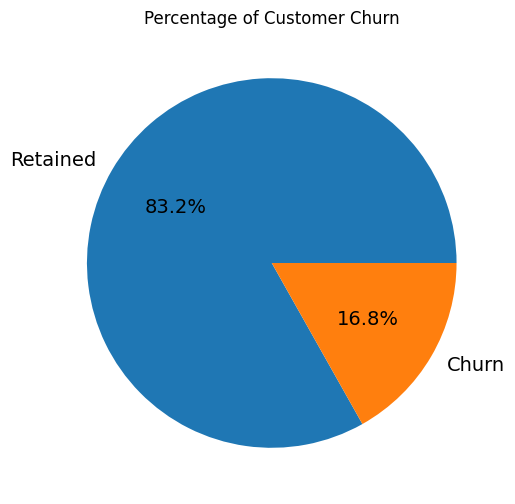

In [13]:
# First, what is the percentage of customer churn
labels = ['Retained','Churn']
counts = data['Churn'].value_counts()
# print(counts)

plt.figure(figsize=(6,6))
plt.title('Percentage of Customer Churn')
plt.pie(counts, autopct='%1.1f%%', labels=labels, textprops={"fontsize":14})
plt.show()


Customer churn based on Gender

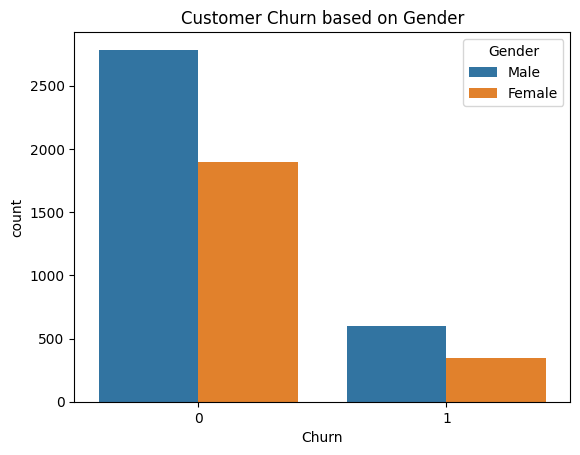

In [14]:
# Which gender most like to churn?
sns.countplot(x=data['Churn'], hue=data['Gender'])
plt.title('Customer Churn based on Gender')
plt.show()


Distribution of Order Count of Customers

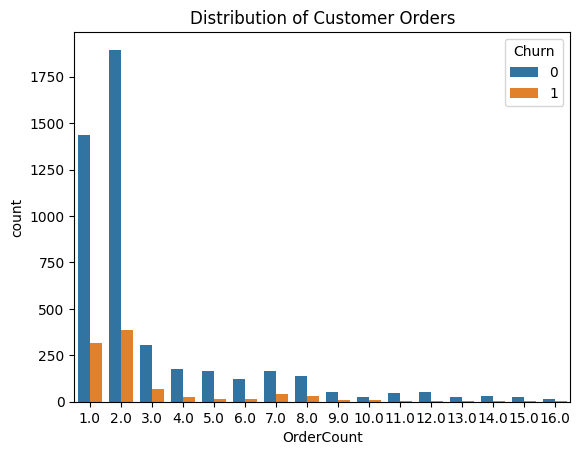

In [15]:
sns.countplot(x=data['OrderCount'], hue=data['Churn'])
plt.title("Distribution of Customer Orders")
plt.show()


Customer Preferred Login Device

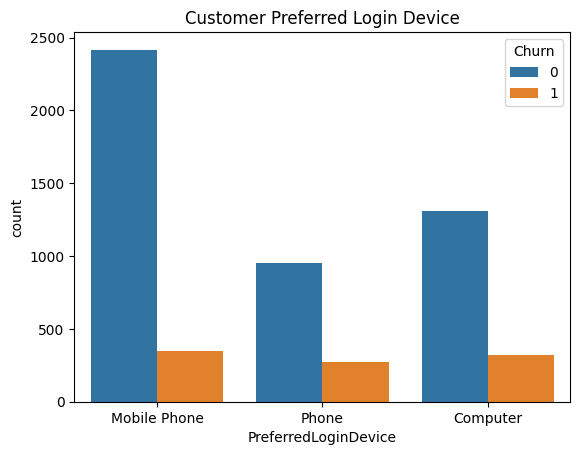

In [16]:
sns.countplot(x=data['PreferredLoginDevice'], hue=data['Churn'])
plt.title('Customer Preferred Login Device')
plt.show()

Customer Preferred Payment

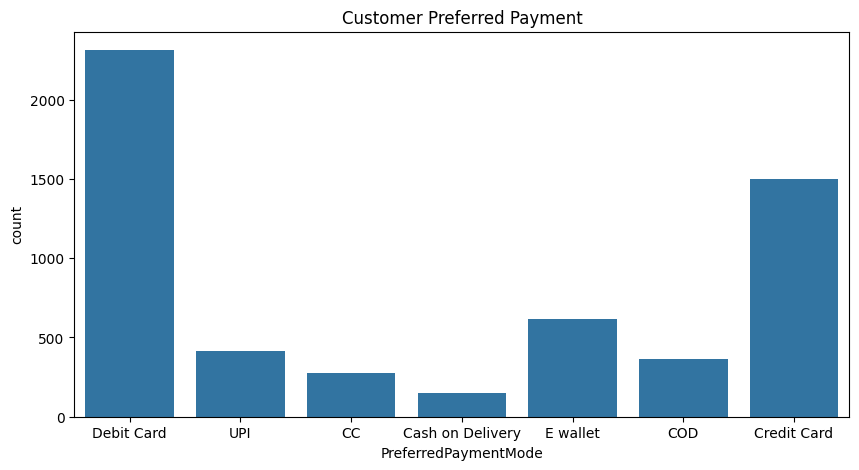

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['PreferredPaymentMode'])
plt.title('Customer Preferred Payment')
plt.show()

Customer Preferred Order Category¶

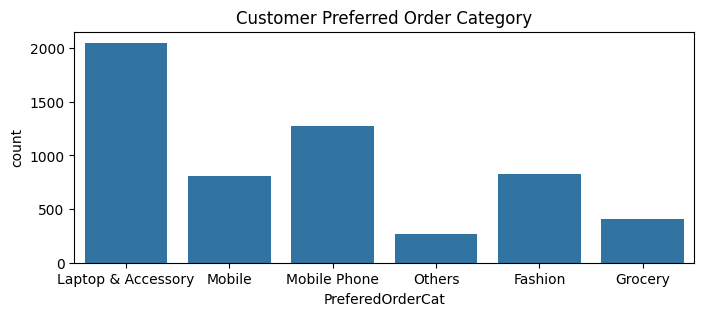

In [18]:
plt.figure(figsize=(8,3))
sns.countplot(x=data['PreferedOrderCat'])
plt.title('Customer Preferred Order Category')
plt.show()


Customer Distance from Warehouse to Home

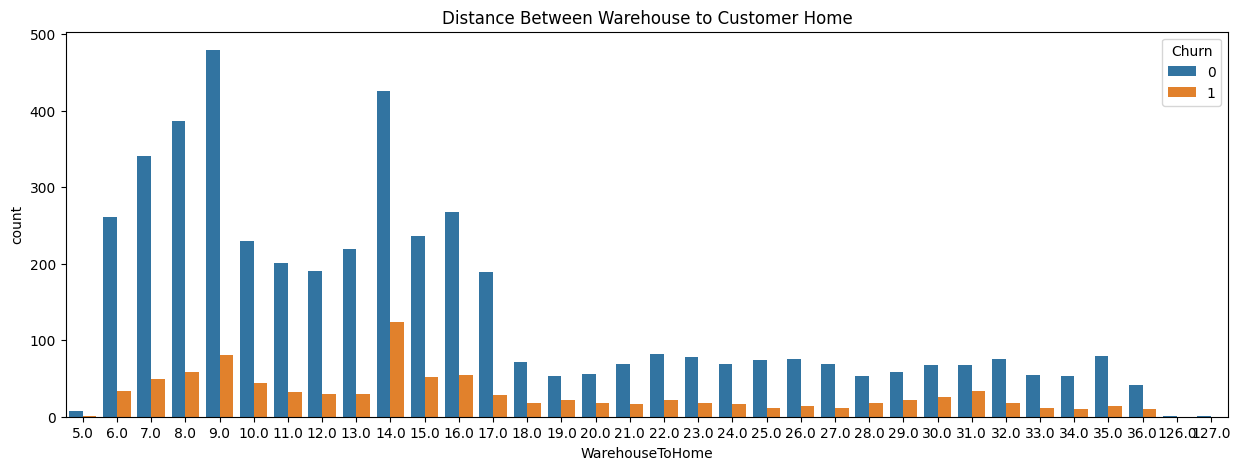

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['WarehouseToHome'], hue=data['Churn'])
plt.title('Distance Between Warehouse to Customer Home')
plt.show()


Customer City Tier

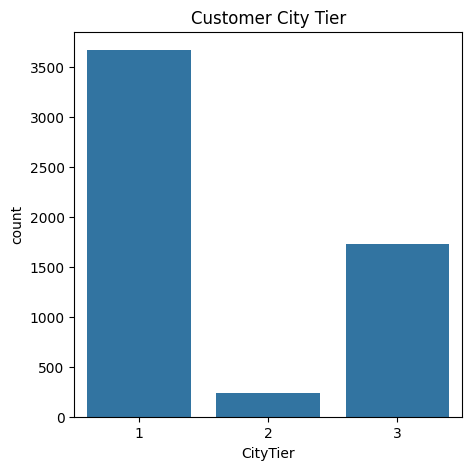

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['CityTier'])
plt.title('Customer City Tier')
plt.show()

Customer Hour Spend On App

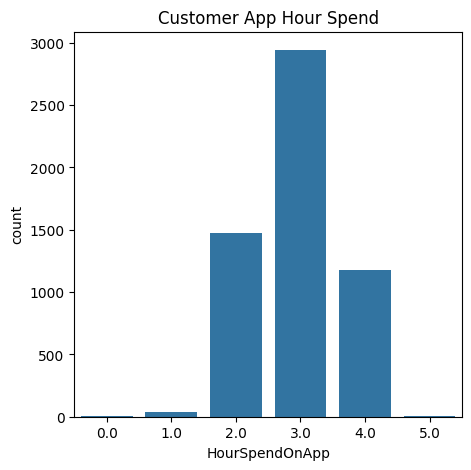

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['HourSpendOnApp'])
plt.title('Customer App Hour Spend')
plt.show()


Customers Satisfaction Score

Average Satisfaction Score: 3.066785079928952


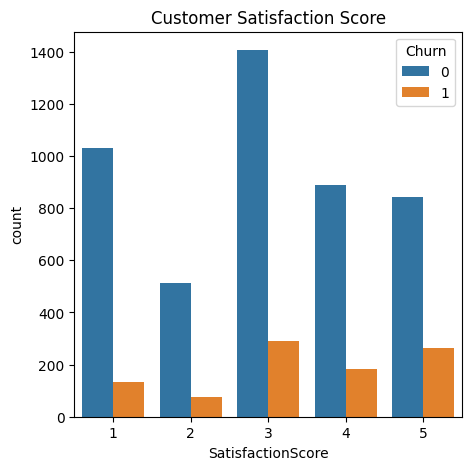

In [22]:
average_score = data['SatisfactionScore'].mean()
print('Average Satisfaction Score:',average_score)

plt.figure(figsize=(5,5))
sns.countplot(x=data['SatisfactionScore'], hue=data['Churn'])
plt.title('Customer Satisfaction Score')
plt.show()

Customer Marital Status

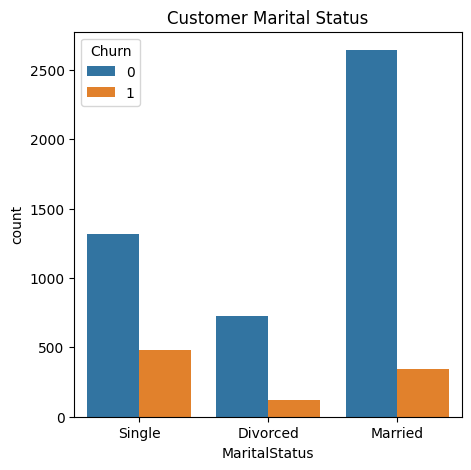

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['MaritalStatus'], hue=data['Churn'])
plt.title('Customer Marital Status')
plt.show()

Customer Complains

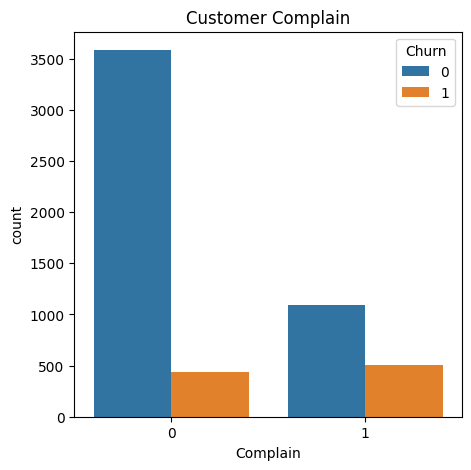

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Complain'], hue=data['Churn'])
plt.title('Customer Complain')
plt.show()


Customer Order

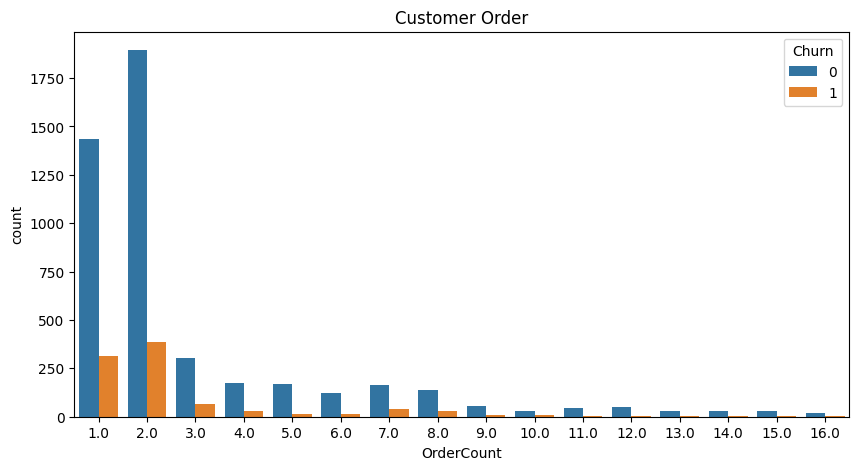

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['OrderCount'], hue=data['Churn'])
plt.title('Customer Order')
plt.show()


Customer Used Coupon

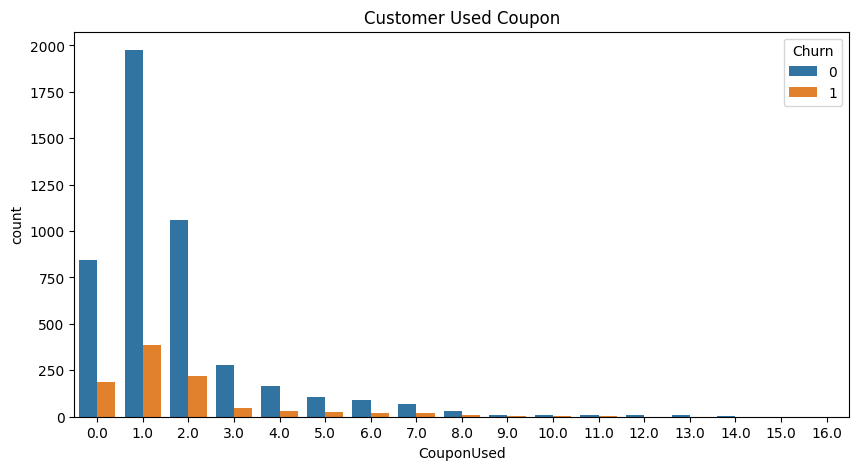

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['CouponUsed'], hue=data['Churn'])
plt.title('Customer Used Coupon')
plt.show()

Customer Day Since Last Order

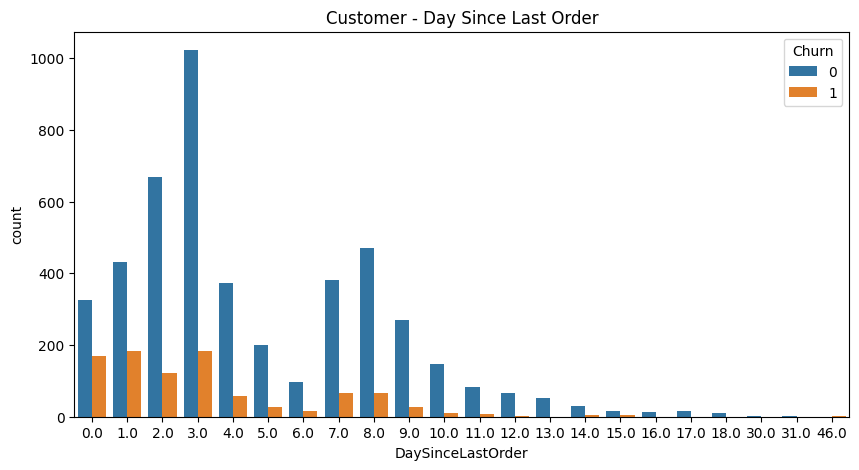

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['DaySinceLastOrder'], hue=data['Churn'])
plt.title('Customer - Day Since Last Order')
plt.show()


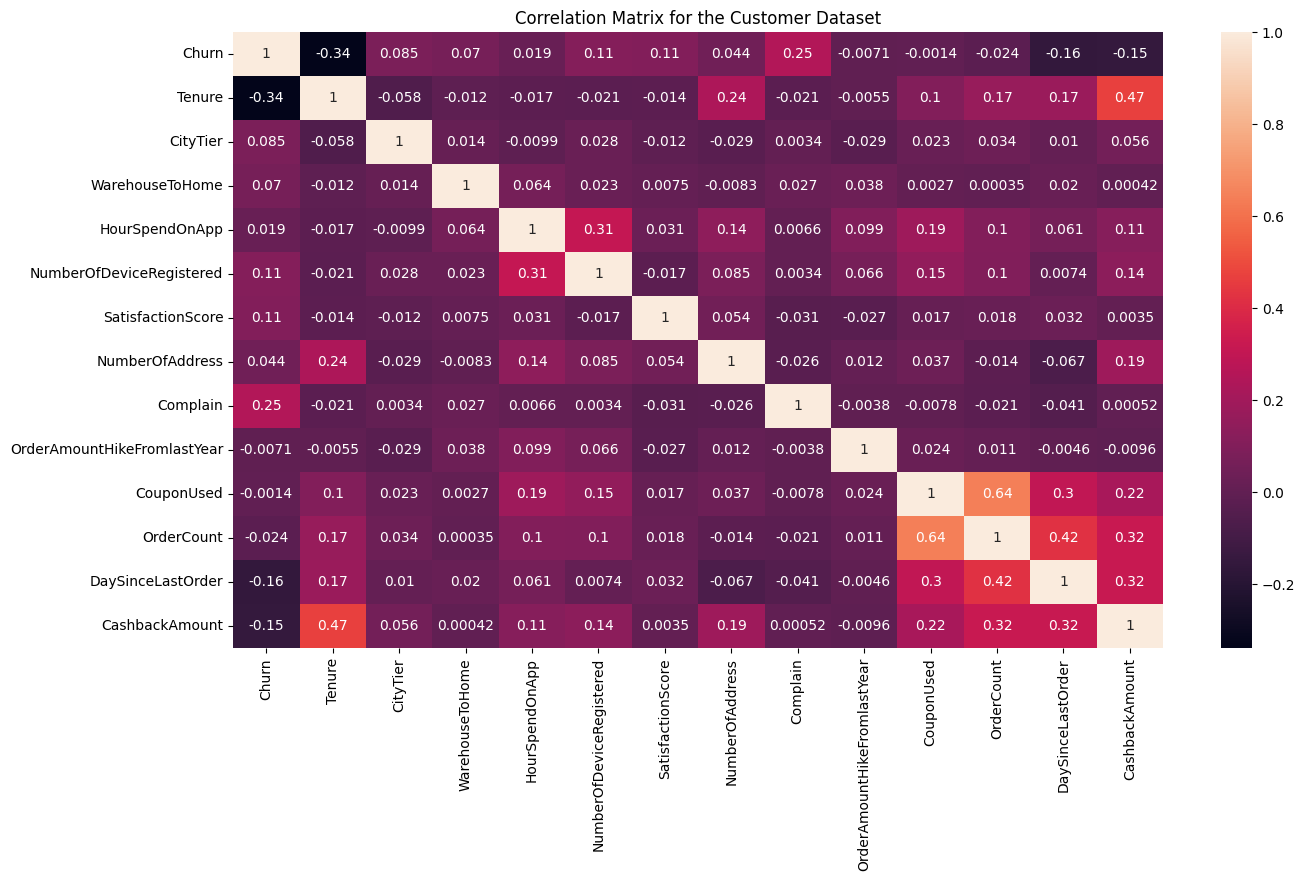

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

Data Preprocessing

In [29]:
# Create function to convert column with dtype object to integer
def object_to_int(x):
    if x.dtype == 'object':
        x = LabelEncoder().fit_transform(x)
    return x

# Convert column dtype object to int
data = data.apply(lambda x : object_to_int(x))

In [30]:
# balance dataset with oversampling
from sklearn.utils import resample
data_0 = data.loc[data['Churn'] == 0]
data_1 = data.loc[data['Churn'] == 1]

# Count total each churn feature
n_0 = len(data_0)
n_1 = len(data_1)

# Applying oversampling method
data_oversampling = resample(data_1, replace=True, n_samples=n_0, random_state=42)
data_new = pd.concat([data_oversampling, data_0])
data_new = data_new.sample(frac=1)
data_new.reset_index(drop=True, inplace=True)

In [31]:
# Check total of churn data after apply oversampling method
data_new['Churn'].value_counts()

,count
Churn,
1,4682
0,4682


LOGISTIC REGRESSION MODEL:

In [32]:
# First we need to the data into 70% training dataset and 30% testing dataset
X = data_new.drop(['Churn'],axis=1)
y = data_new['Churn']

from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
logreg_prediction = logreg.predict(X_test)
print('Accuracy Score: %s ' % accuracy_score(y_test, logreg_prediction))
print(classification_report(y_test, logreg_prediction))

Accuracy Score: 0.79644128113879 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1392
           1       0.79      0.81      0.80      1418

    accuracy                           0.80      2810
   macro avg       0.80      0.80      0.80      2810
weighted avg       0.80      0.80      0.80      2810



K-Nearest Neighbor (KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_prediction = logreg.predict(X_test)
print('Accuracy Score: %s ' % accuracy_score(y_test, knn_prediction))
print(classification_report(y_test, knn_prediction))

Accuracy Score: 0.79644128113879 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1392
           1       0.79      0.81      0.80      1418

    accuracy                           0.80      2810
   macro avg       0.80      0.80      0.80      2810
weighted avg       0.80      0.80      0.80      2810



Support Vector Machine (SVM)

In [35]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)
print('Accuracy Score: %s' % accuracy_score(y_test, svc_prediction))
print(classification_report(y_test, svc_prediction))

Accuracy Score: 0.7558718861209964
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      1392
           1       0.73      0.82      0.77      1418

    accuracy                           0.76      2810
   macro avg       0.76      0.76      0.75      2810
weighted avg       0.76      0.76      0.75      2810



In [36]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)
print('Accuracy Score: %s' % accuracy_score(y_test, svc_prediction))
print(classification_report(y_test, svc_prediction))

Accuracy Score: 0.7558718861209964
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      1392
           1       0.73      0.82      0.77      1418

    accuracy                           0.76      2810
   macro avg       0.76      0.76      0.75      2810
weighted avg       0.76      0.76      0.75      2810



Conclusion
After build 3 Machine Learning Model and also testing it. Here's the summary of each models result:

Logistic Regression:
Accuracy Score: 0.79
Customer Churn Precision: 0.80
Customer Churn Recall: 0.80
K-Nearest Neighbor (KNN):
Accuracy Score: 0.79
Customer Churn Precision: 0.80
Customer Churn Recall: 0.80
Support Vector Machine (SVM):
Accuracy Score: 0.76
Customer Churn Precision: 0.75
Customer Churn Recall: 0.82
This models can be improved by tuning the hyperparameter to make prediction more accurate